## Filippo Casari Assignment 1
# Assignment 1

Will this approach work if the end frame of a link (e.g. L1e) is offset from the 
x
 axis of the starting link? Try it!
Build a robot arm with one revolute joint and one translational joint.
# Preparation and importing

In [9]:
import ipywidgets
import matplotlib.pyplot as plt
import numpy as np

In [10]:



np.set_printoptions(precision=4, suppress=True)

def mktr(x, y):
    return np.array([[1, 0, x], [0, 1, y], [0, 0, 1]])


def mkrot(theta):
    return np.array(
        [
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta), np.cos(theta), 0],
            [0, 0, 1],
        ]
    )

#Assignment 1, point 1

theta1, theta2 = np.pi / 6, -2 * np.pi / 6
l1, l2, l3 = 1.5, 1.5, 3.0
World = np.eye(3)
L1s = World @ mkrot(theta1)
L1e = L1s @ mktr(l1, 0)
L1e2=L1e @ mktr(0, l3) # added new joint
L2s = L1e2 @ mkrot(theta2)
L2e = L2s @ mktr(l2, 0)

def drawf(f, ax=None, name=None):
    """ Draw frame defined by f on axis ax (if provided) or on a new axis otherwise """
    xhat = f @ np.array([[0, 0, 1], [1, 0, 1]]).T
    yhat = f @ np.array([[0, 0, 1], [0, 1, 1]]).T
    if not ax:
        ax = plt.gca()
    ax.plot(xhat[0, :], xhat[1, :], "r-")  # transformed x unit vector
    ax.plot(yhat[0, :], yhat[1, :], "g-")  # transformed y unit vector
    if name:
        ax.text(xhat[0, 0], xhat[1, 0], name, va="top", ha="center")

#fig, ax = plt.subplots()
#plt.axis("equal")
#for f in [World, L1e2, L2e]:
  #  drawf(f, ax)
#I added the variable 
#l
#3
#l
#3
# which specifies the end position of the 
#x
#x
# axes of the first arm


def fw_kinematics(theta1, theta2, l1=1.2, l2=1.5, l3=1.6):
    world = np.eye(3)
    L1s = world @ mkrot(theta1)
    L1e = L1s @ mktr(l1,0 ) 
    L1e2=L1e @ mktr(0, l3) # added new joint
    L2s = L1e2 @ mkrot(theta2)
    L2e = L2s @ mktr(l2, 0)
    return world, L1s, L1e,L1e2, L2s, L2e 


@ipywidgets.interact(
    theta1=ipywidgets.FloatSlider(min=-np.pi, max=+np.pi,step=0.0000001, value=0),
    theta2=ipywidgets.FloatSlider(min=-np.pi, max=+np.pi,step=0.0000001, value=0),
    l1=ipywidgets.FloatSlider(min=1, max=10, value=0),
    l2=ipywidgets.FloatSlider(min=1, max=10, value=0),
    l3=ipywidgets.FloatSlider(min=1, max=10, value=0)
)
def draw(theta1, theta2, l1, l2, l3):
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.axis("equal")
    for f in fw_kinematics(theta1, theta2, l1, l2, l3):  # This iterates over all frames
        drawf(f, ax)
    ax.set(xlim=(-10, 10), ylim=(-10, 10))
#Point 2 of Assignment 1

#The second arm can just translate while the first one can only rotate





interactive(children=(FloatSlider(value=0.0, description='theta1', max=3.141592653589793, min=-3.1415926535897…

In [11]:
def fw_kinematics_2(theta1, length):
    world = np.eye(3)
    L1s = world @ mkrot(theta1)
    L1e = L1s @ mktr(l1,0 ) 
    L2s=L1e.copy()
    L2e = L2s @ mktr(length, 0.0)
    return world, L1s, L1e, L2s, L2e 

def fw_kinematics(theta1, theta2):
    world = np.eye(3)
    L1s = world @ mkrot(theta1)
    L1e = L1s @ mktr(l1, 0)
    L2s = L1e @ mkrot(theta2)
    L2e = L2s @ mktr(l2, 0)
    return world, L1s, L1e, L2s, L2e

@ipywidgets.interact(
    theta1=ipywidgets.FloatSlider(min=-np.pi, max=+np.pi,step=0.0000001, value=0.0),
    
    length=ipywidgets.FloatSlider(min=0, max=10.0, value=0.0)
)
def draw(theta1, length):
    fig, ax = plt.subplots(figsize=(7, 7))
    plt.axis("equal")
    for f in fw_kinematics(theta1,length):  # This iterates over all frames
        drawf(f, ax)
    ax.set(xlim=(-5, 5), ylim=(-5, 5))

interactive(children=(FloatSlider(value=0.0, description='theta1', max=3.141592653589793, min=-3.1415926535897…

## Assignment 2


In [12]:
'''# minimum and maximum admissible values for theta1
theta1_range = [0, 0.5 * np.pi]
theta2_range = [0, np.pi / 2]  # minimum and maximum admissible values for theta2
theta1s, theta2s = np.meshgrid(
    np.linspace(*theta1_range, 100), np.linspace(*theta2_range, 100)
)
k = 2
endeffector_positions = []
radius=0.5
center_circle_x, center_circle_y=1.0,2.0
robot_points=[]
valids=[]
for theta1, theta2 in zip(theta1s.flatten(), theta2s.flatten()):
    frames = fw_kinematics(theta1, theta2)
    first_arm_s, first_arm_e=(frames[1] @ np.array([[0, 0, 1]]).T )[0:2], (frames[2]@ np.array([[0, 0, 1]]).T)[0:2]
    second_arm_s, second_arm_e= (frames[2]@ np.array([[0, 0, 1]]).T)[0:2], (frames[3]@ np.array([[0, 0, 1]]).T)[0:2]
    linspace_1=np.linspace(first_arm_s[0], first_arm_e[0], 100)
    linspace_2=np.linspace(second_arm_s[0], second_arm_e[0], 100)
    linespace=np.concatenate((linspace_1, linspace_2), axis=0)
    print(linespace.shape)
    x, y=[first_arm_s[0][0], first_arm_e[0][0]], [first_arm_s[1][0], first_arm_e[1][0]]
    x2, y2=[second_arm_s[0][0], second_arm_e[0][0]],[second_arm_s[1][0], second_arm_e[1][0]]
    
    robot_points.append(np.interp(linspace_1, x,  y))
    robot_points.append(np.interp(linspace_2,  x2, y2 ))
    endeffector_pose = frames[-1]  # Pose of the end effector
    
    endeffector_position = endeffector_pose @ np.array([[0, 0, 1]]).T
    no_collision=True
    #print(linespace)
    print(len(robot_points))
    for i in range(len(linespace)):
        print(robot_points[0][i])
        if((linespace[i]-center_circle_x)**2 + (robot_points[i]-center_circle_y)**2 <= radius**2):
            
            no_collision=False
    
    valids.append(no_collision)
        
        
    endeffector_positions.append(endeffector_position[0:2, 0])
print(robot_points)

endeffector_positions = np.array(endeffector_positions)
#valids = (linespace[:, 0]-center_circle_x)**2 + (endeffector_positions[:, 1]-center_circle_y)**2 > radius**2

## Point 1
#valids = (endeffector_positions[:, 0]-center_circle_x)**2 + (endeffector_positions[:, 1]-center_circle_y)**2 > radius**2
print(valids)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
plt.axis("equal")
drawf(np.eye(3), ax=ax1, name="World")
ax1.plot(
    endeffector_positions[valids, 0], endeffector_positions[valids, 1], "b.", alpha=0.1
)
ax1.plot(center_circle_x, center_circle_y, marker='o', markersize=5)
ax1.plot(
    endeffector_positions[~valids, 0],
    endeffector_positions[~valids, 1], # ~ for bits complement, drawing red figure
    "r.",
    alpha=0.1,
)
ax1.set(xlabel="end effector $x$", ylabel="end effector $y$", title="Workspace")
ax1.axis("equal")
print(valids==True)
ax2.imshow(
    valids.reshape(theta1s.shape),
    extent=theta1_range + theta2_range,
    origin="lower",
    cmap="coolwarm_r",
    aspect="auto",
)
ax2.set(xlabel="theta_1", ylabel="theta_2", title="C-Space")
'''

'# minimum and maximum admissible values for theta1\ntheta1_range = [0, 0.5 * np.pi]\ntheta2_range = [0, np.pi / 2]  # minimum and maximum admissible values for theta2\ntheta1s, theta2s = np.meshgrid(\n    np.linspace(*theta1_range, 100), np.linspace(*theta2_range, 100)\n)\nk = 2\nendeffector_positions = []\nradius=0.5\ncenter_circle_x, center_circle_y=1.0,2.0\nrobot_points=[]\nvalids=[]\nfor theta1, theta2 in zip(theta1s.flatten(), theta2s.flatten()):\n    frames = fw_kinematics(theta1, theta2)\n    first_arm_s, first_arm_e=(frames[1] @ np.array([[0, 0, 1]]).T )[0:2], (frames[2]@ np.array([[0, 0, 1]]).T)[0:2]\n    second_arm_s, second_arm_e= (frames[2]@ np.array([[0, 0, 1]]).T)[0:2], (frames[3]@ np.array([[0, 0, 1]]).T)[0:2]\n    linspace_1=np.linspace(first_arm_s[0], first_arm_e[0], 100)\n    linspace_2=np.linspace(second_arm_s[0], second_arm_e[0], 100)\n    linespace=np.concatenate((linspace_1, linspace_2), axis=0)\n    print(linespace.shape)\n    x, y=[first_arm_s[0][0], first_arm_

### Point 2

10000
10000
arm 1 shape: (10000, 2, 50, 1)
arm 2 shape: (10000, 2, 50, 1)


[Text(0.5, 0, 'theta_1'), Text(0, 0.5, 'theta_2'), Text(0.5, 1.0, 'C-Space')]

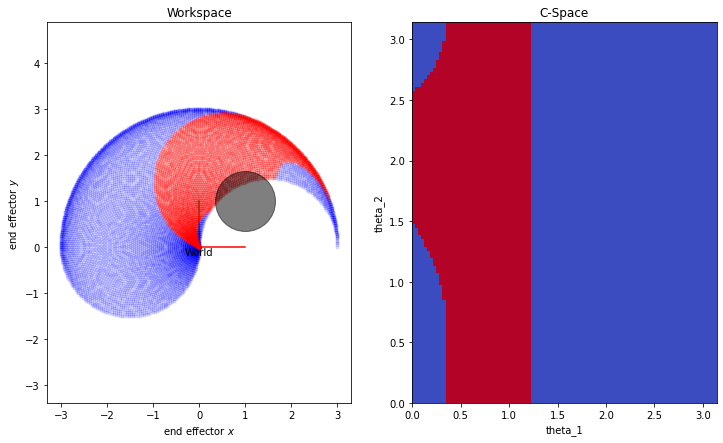

In [20]:
# minimum and maximum admissible values for theta1
theta1_range = [0, np.pi]
theta2_range = [0, np.pi]  # minimum and maximum admissible values for theta2
theta1s, theta2s = np.meshgrid(
    np.linspace(*theta1_range, 100), np.linspace(*theta2_range, 100)
)
radius=0.6
center_circle_x, center_circle_y=1.0, 1.0
endeffector_positions = []
valids=[]

arm_1=[]
arm_2=[]
num_points=50
radius_squared=radius**2
for theta1, theta2 in zip(theta1s.flatten(), theta2s.flatten()):
    frames = fw_kinematics(theta1, theta2)
    first_arm_s, first_arm_e=(frames[1] @ np.array([[0, 0, 1]]).T )[0:2], (frames[2]@ np.array([[0, 0, 1]]).T)[0:2]
    second_arm_s, second_arm_e= (frames[3] @ np.array([[0, 0, 1]]).T)[0:2], (frames[4]@ np.array([[0, 0, 1]]).T)[0:2]
    '''print(f"first arm start: x={first_arm_s[0].item():2.2f}, y={first_arm_s[1].item():2.2f}\n \
          second arm start: x={second_arm_s[0].item():2.2f}, y={second_arm_s[1].item():2.2f}\n \
            second arm end: x={second_arm_e[0].item():2.2f}, y={second_arm_e[1].item():2.2f}")'''
    arm_1_x=np.linspace(first_arm_s[0], first_arm_e[0], num_points)
    arm_1_y=np.linspace(first_arm_s[1], first_arm_e[1], num_points)
    arm_1.append([arm_1_x, arm_1_y])
    
    arm_2_x=np.linspace(second_arm_s[0], second_arm_e[0], num_points)
    arm_2_y=np.linspace(second_arm_s[1], second_arm_e[1], num_points)
    arm_2.append([arm_2_x, arm_2_y])
    no_collision = True
    endeffector_pose = frames[-1]  # Pose of the end effector
    endeffector_position = endeffector_pose @ np.array([[0, 0, 1]]).T
    endeffector_positions.append(endeffector_position[0:2, 0])
    for i in range(num_points):
        diff1_x, diff1_y, diff2_x, diff2_y=(arm_1_x[i]-center_circle_x)**2, (arm_1_y[i]-center_circle_y)**2,\
            (arm_2_x[i]-center_circle_x)**2, (arm_2_y[i]-center_circle_y)**2
        if((( diff1_x+ diff1_y)<=(radius**2)) or (diff2_x + diff2_y)<=radius_squared):
            no_collision=False
            break
    
    valids.append(no_collision)
    #if(no_collision==False):
     #   print(f'collision? {no_collision}')
endeffector_positions = np.array(endeffector_positions)
valids=np.array(valids)
print(len(valids == False))
print(len(valids == True))


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))

    
plt.axis("equal")
drawf(np.eye(3), ax=ax1, name="World")
ax1.plot(
    endeffector_positions[valids, 0], endeffector_positions[valids, 1], "b.", alpha=0.1
)
ax1.plot(
    endeffector_positions[~valids, 0],
    endeffector_positions[~valids, 1], # ~ for bits complement, drawing red figure
    "r.",
    alpha=0.2,
)
#print(endeffector_positions[~valids, 0])
#print(endeffector_positions[valids, 0])
#import matplotlib
#circle=matplotlib.patches.Circle((center_circle_x, center_circle_y), radius)
arm_1=np.array(arm_1)
arm_2=np.array(arm_2)
ax1.set(xlabel="end effector $x$", ylabel="end effector $y$", title="Workspace")
ax1.axis("equal")
import matplotlib

ax1.plot(center_circle_x, center_circle_y, marker='o', markersize=radius*100, alpha=0.5, color= "black")
print(f'arm 1 shape: {arm_1.shape}')
print(f'arm 2 shape: {arm_2.shape}')

'''for i in range(len(arm_1)):
    #print(arm_1[:, 0][i].ravel())
    
    ax1.plot(arm_1[:, 0][i].ravel(), arm_1[:, 1][i].ravel())
    ax1.plot(arm_2[:, 0][i].ravel(), arm_2[:, 1][i].ravel())
'''
ax2.imshow(
    valids.reshape(theta1s.shape),
    extent=theta1_range + theta2_range,
    origin="lower",
    cmap="coolwarm_r",
    aspect="auto",
)
#ax1.add_patch(circle)
#ax1.plot(np.linspace(first_arm_s[0], first_arm_e[0], 100), np.linspace(second_arm_s[1], second_arm_e[1], 100),marker='.' , markersize=6, color='g')

ax2.set(xlabel="theta_1", ylabel="theta_2", title="C-Space")





In [14]:
print(f"Example: if theta 1 = {np.pi/3:2.4} and theta 2 = {np.pi/6:2.4}, the position is not allowed")

Example: if theta 1 = 1.047 and theta 2 = 0.5236, the position is not allowed


### Point 1 (Assignment 2)

[False False False ... False False False]


[Text(0.5, 0, 'theta_1'), Text(0, 0.5, 'theta_2'), Text(0.5, 1.0, 'C-Space')]

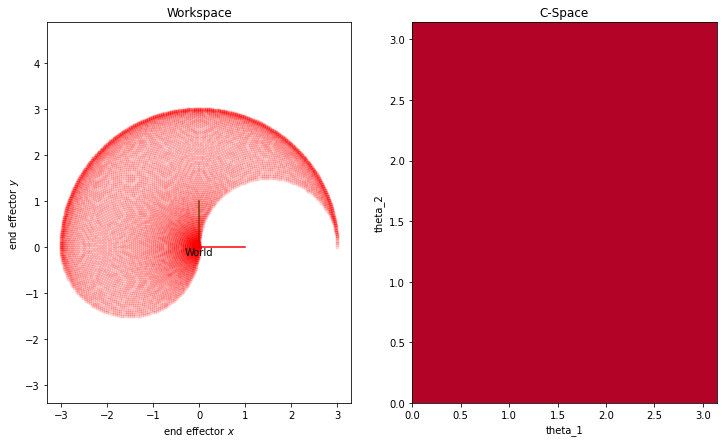

In [15]:

# minimum and maximum admissible values for theta1
theta1_range = [0, np.pi ]
theta2_range = [0, np.pi ]  # minimum and maximum admissible values for theta2
theta1s, theta2s = np.meshgrid(
    np.linspace(*theta1_range, 100), np.linspace(*theta2_range, 100)
)

endeffector_positions = []
for theta1, theta2 in zip(theta1s.flatten(), theta2s.flatten()):
    frames = fw_kinematics(theta1, theta2)
    endeffector_pose = frames[-1]  # Pose of the end effector
    endeffector_position = endeffector_pose @ np.array([[0, 0, 1]]).T
    endeffector_positions.append(endeffector_position[0:2, 0])
endeffector_positions = np.array(endeffector_positions)
valids = (endeffector_positions[:, 0]-center_circle_x)**2 + (endeffector_positions[:, 1]-center_circle_y)**2 > radius**2
print(valids)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
plt.axis("equal")
drawf(np.eye(3), ax=ax1, name="World")
ax1.plot(
    endeffector_positions[valids, 0], endeffector_positions[valids, 1], "b.", alpha=0.1
)
ax1.plot(
    endeffector_positions[~valids, 0],
    endeffector_positions[~valids, 1], # ~ for bits complement, drawing red figure
    "r.",
    alpha=0.1,
)
ax1.set(xlabel="end effector $x$", ylabel="end effector $y$", title="Workspace")
ax1.axis("equal")

ax2.imshow(
    valids.reshape(theta1s.shape),
    extent=theta1_range + theta2_range,
    origin="lower",
    cmap="coolwarm_r",
    aspect="auto",
)
ax2.set(xlabel="theta_1", ylabel="theta_2", title="C-Space")
